У цьому домашньому завданні ми продовжуємо працювати з набором даних `Yulu`, з яким почали працювати в "hw 4.3. Робота з DataFrame. Діаграма розсіювання.". Фокус цього ДЗ в тому, аби будувати візуалізації використовуючи методи бібліотеки `seaborn`. Це дозволяє будувати гарніні візуалізації, а іноді також робити це швидше, ніж з `matplotlib`.

Документація до тої частини бібліотеки, з якою тут працюємо

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

### Профіль колонок набору даних:

- **datetime**: дата та час зібрані погодинно
- **season**: сезон (1: весна, 2: літо, 3: осінь, 4: зима)
- **holiday**: чи є день святковим (витягнуто з http://dchr.dc.gov/page/holiday-schedule)
- **workingday**: якщо день не є вихідним або святковим, то позначається як 1, в іншому випадку – 0.
- **weather**:
  1. Ясно, Мало хмарно, частково хмарно
  2. Туман + Хмарно, Туман + Розірвані хмари, Туман + Мало хмарно, Туман
  3. Легкий сніг, Легкий дощ + Гроза + Розсіяні хмари, Легкий дощ + Розсіяні хмари
  4. Сильний дощ + Крижані кулі + Гроза + Туман, Сніг + Туман
- **temp**: температура в градусах Цельсія
- **atemp**: як відчувається температура в градусах Цельсія
- **humidity**: вологість
- **windspeed**: швидкість вітру
- **casual**: кількість неформальних користувачів
- **registered**: кількість зареєстрованих користувачів
- **count**: загальна кількість велосипедів, взятих в оренду, включаючи неформальних та зареєстрованих користувачів

0. Імпортуйте бібліотеки `matplotlib.pyplot`, `seaborn` та `pandas`.  Завантажте дані з файла `yulu_rental.csv` у `pandas.DataFrame` `df`.

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


In [4]:
df = pd.read_csv('/drive/MyDrive/Colab_Notebooks/Data_Analyst_Course_HP/Module_4/Data_M4/yulu_rental.csv')

1. Користуючись методом `seaborn.jointplot` побудуйте візуалізацію графіка розсіювання між змінними `humidity` та `count`, зазначивши колір точки в відповідності до значення змінної `weather`. Опишіть свої спостереження з графіку. Що бачите цікавого і корисного для прийняття рішень на основі цих даних?

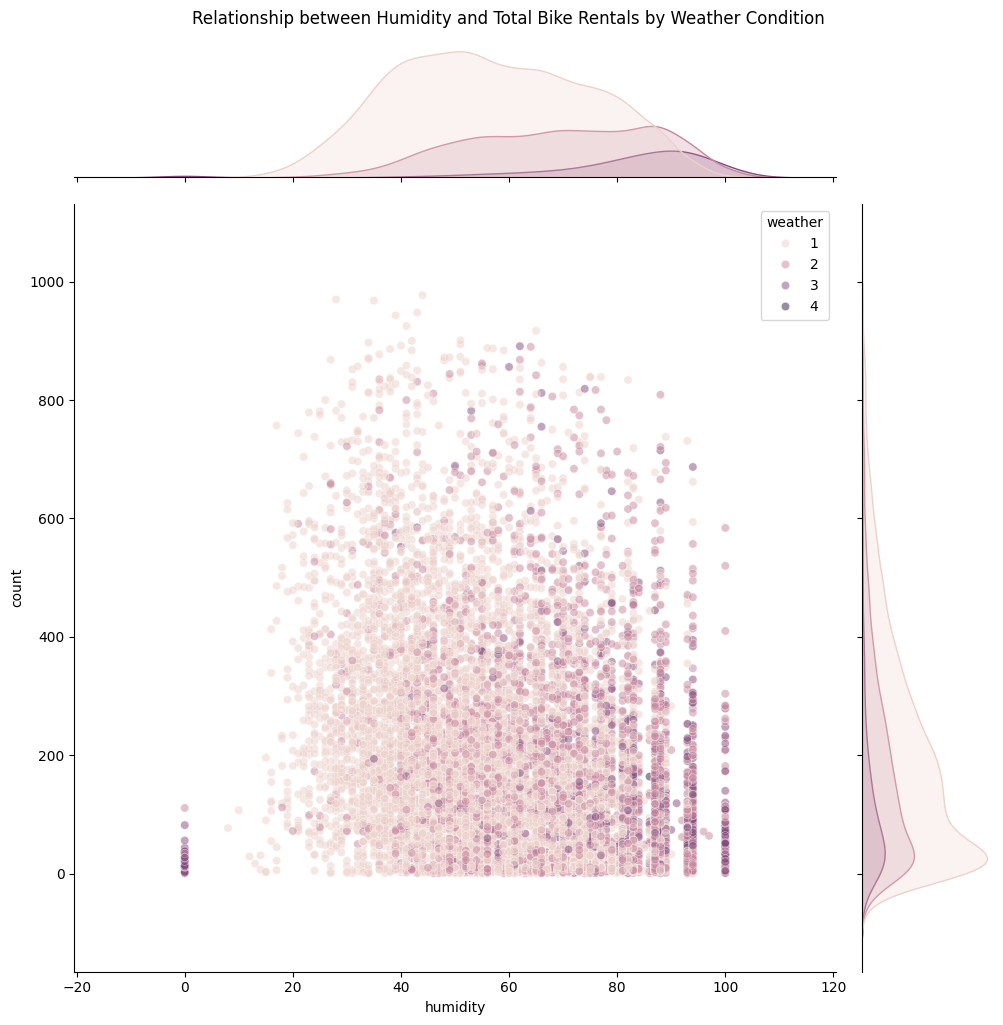

In [9]:
# Step 1. Create jointplot with humidity and count
sns.jointplot(data=df,
             x='humidity',
             y='count',
             hue='weather',  # color by weather condition
             alpha=0.5,
             height=10)  # size of the plot

# Step 2. Update title
plt.suptitle('Relationship between Humidity and Total Bike Rentals by Weather Condition',
            y=1.02);


### **Observations:**

**1. Distribution Patterns:**

Main scatter plot shows relationship between humidity and total rentals.
Top histogram shows humidity distribution.
Right histogram shows distribution of total rentals.
Colors indicate different weather conditions.

**2. Weather Impact:**

*   Clear weather (1): Highest rental counts (majority of points)
*   Cloudy (2): Moderate rental counts
*   Light rain/snow (3): Significantly lower counts
*   Heavy weather (4): Very few rentals

**3. Humidity Effects:**

*  Peak rentals: 40-60% humidity range
*  Decline in rentals at high humidity (>80%)
*  Lower rentals at very low humidity
*  Clear negative correlation

**4. Business Insights:**

*  Optimal conditions: moderate humidity + good weather
*  Worst conditions: high humidity + poor weather
*  Most common humidity range appears to be 50-75%

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=16BksRhZzoz4ynPKCPjXEek56XBsAEF6T)

2. Відфільтруйте і збережіть в окремій змінній лише дані з сезоно "весна" і "літо" (звернітся до опису даних вгорі ноутбуку, аби зрозуміти, які значення вам треба обрати.
Користуючись методом `seaborn.jointplot` побудуйте візуалізацію графіка розсіювання між змінними `casual` та `registered`, зазначивши колір точки в відповідності до значення змінної `season`. Встановіть прозорість на 0.2.

Опишіть свої спостереження з графіку. Що бачите цікавого і корисного для прийняття рішень на основі цих даних?

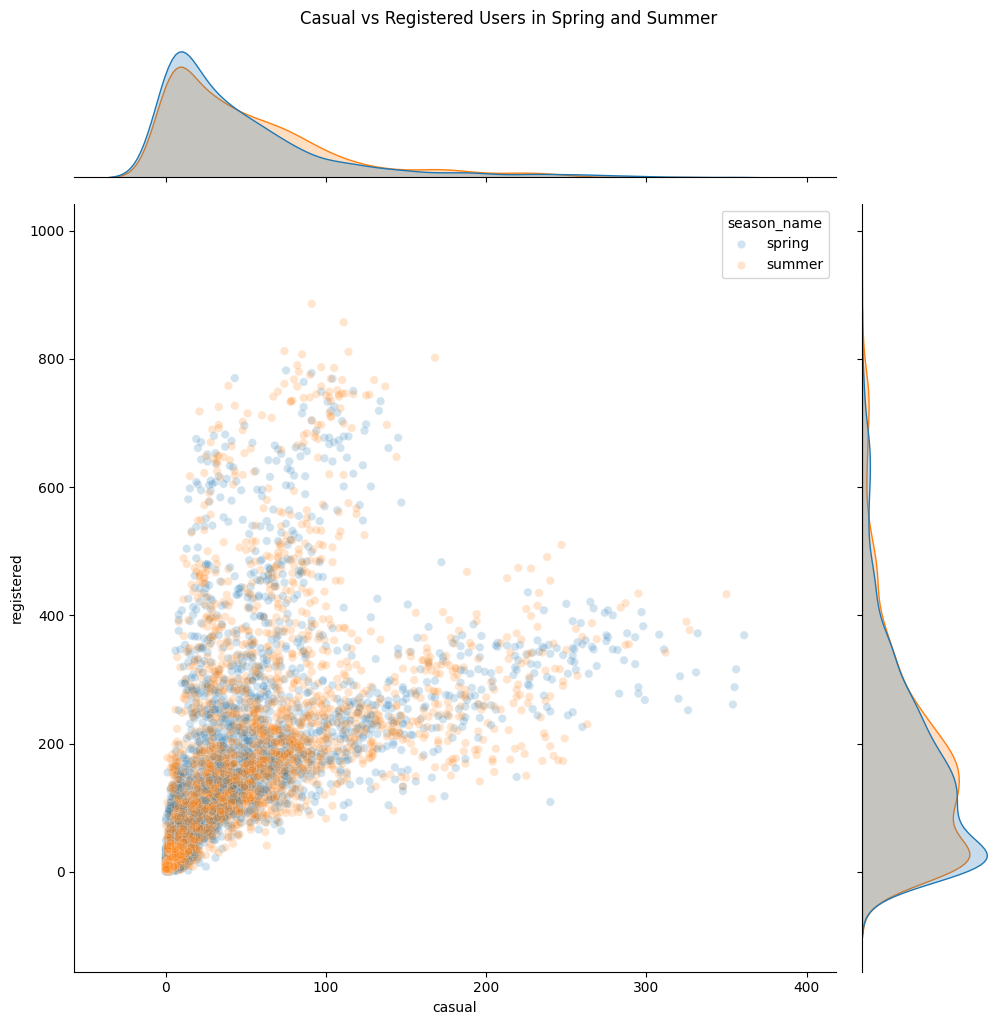

In [11]:
# Step 1. Create season column (1: spring, 2: summer)
df['season_name'] = df['season'].map({2: 'spring', 3: 'summer'})

# Step 2. Filter spring and summer data
spring_summer_df = df[df['season'].isin([2, 3])]

# Step 3. Create jointplot
sns.jointplot(data=spring_summer_df,
              x='casual',
              y='registered',
              hue='season_name',  # color by season
              alpha=0.2,          # set transparency
              height=10)          # set figure size

plt.suptitle('Casual vs Registered Users in Spring and Summer', y=1.02);


####**Distribution Patterns:**

1. Higher density of registered users compared to casual
2. Clear separation between seasons
3. Wider spread in summer

####**Season-Specific Patterns:**

1. Summer shows higher numbers for both user types
2. Spring has more moderate usage
3. More outliers in summer

####**User Type Relationships:**

1. Positive correlation between casual and registered users
2. Stronger correlation in summer
3. Different slopes for different seasons

####**Key Insights:**

1. Summer is peak season for both user types
2. Different user behavior patterns by season
3. Higher variability in summer usage



3. Для дослідження як розподілу значень  `humidity` в залежності від погоди (`weather`) побудуйте візуалізацію типу "ящик з вусами" (box plot)користуючись відповідним методом бібліотеки seaborn:

https://seaborn.pydata.org/generated/seaborn.boxplot.html


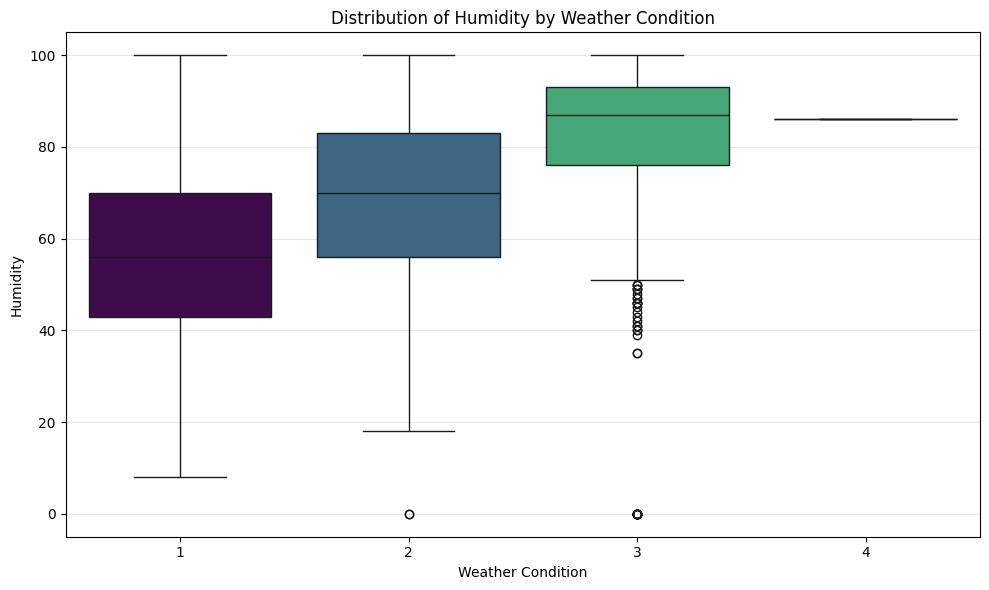

In [12]:
# Step 1. Create box plot with corrected syntax
plt.figure(figsize=(10, 6))
sns.boxplot(data=df,
            x='weather',
            y='humidity',
            hue='weather',  # hue parameter
            legend=False,
            palette='viridis')

# Step 2. Add labels and title
plt.xlabel('Weather Condition')
plt.ylabel('Humidity')
plt.title('Distribution of Humidity by Weather Condition')

# Step 3. Add grid
plt.grid(axis='y', alpha=0.3)

# Show plot
plt.tight_layout();


### **Analysis of the box plot:**

***Weather Condition 1 (Clear/Partly Cloudy):***
*   Lowest median humidity
*   Relatively small spread
*   Some outliers at high humidity levels
*   Most consistent humidity range

***Weather Condition 2 (Mist/Cloudy):***
*   Higher median humidity than condition 1
*   Larger spread of values
*   More symmetric distribution
*   Expected for cloudy conditions

***Weather Condition 3 (Light Snow/Rain):***
*   Even higher median humidity
*   Wider spread than conditions 1 and 2
*   Makes sense for light precipitation

***Weather Condition 4 (Heavy Rain/Snow):***
*   Highest median humidity
*   Large spread of values
*   Fewer data points (box appears thinner)
*   Consistent with heavy precipitation

**Key Insights:**

1. Clear progression of humidity from clear to rainy weather;
2. Weather conditions strongly correlate with humidity levels;
3. Each weather type has distinct humidity characteristics;
4. Outliers present in all conditions

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1_6CBacvDlbuV1XD9GNoGn9sJOSfr74pS)


4. Використайте бібліотеку Seaborn для створення **парних графіків** (pairplot) розсіювання, які показуватимуть взаємозв'язки між кількістю зареєстрованих, неформальних користувачів та загальною кількістю велосипедів, взятих на прокат. Кожен графік повинен розрізняти робочі та святкові дні за кольором.

Для побудови цієї візуалізації спочатку відфільтруйте потрібні колонки в даних і потім зробіть візуалізацію.

Проаналізуйте візуалізацію і скажіть, чи можна виявити особливу поведінку користувачів у святкові дні з цих графіків?

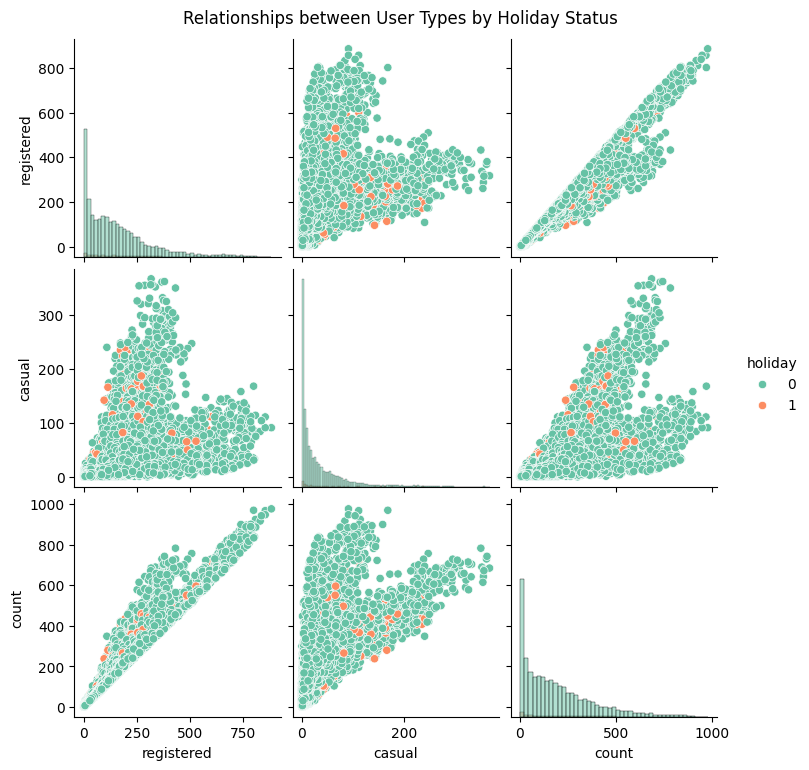

In [13]:
# Step 1. Select relevant columns
columns_of_interest = ['registered', 'casual', 'count', 'holiday']
plot_data = df[columns_of_interest]

# Step 2. Create pairplot
sns.pairplot(data=plot_data,
             hue='holiday',  # color by holiday/non-holiday
             palette='Set2',  # color scheme
             diag_kind='hist')  # histogram on diagonal

plt.suptitle('Relationships between User Types by Holiday Status', y=1.02);


### **Analysis of patterns:**

***Casual Users on Holidays:***
*  Higher numbers of casual users on holidays
*  More scattered distribution
*  Stronger correlation with total count
*  Less predictable patterns

***Registered Users on Holidays:***

*  Lower numbers compared to working days
*  More concentrated distribution
*  Still dominant in total count
*  More consistent patterns

***Working Days vs Holidays:***

*  Working days show higher registered users
*  Holidays show higher casual users
*  Different slopes in relationships
*  Clear segmentation of user types

**Key Insights:**

1. Registered users are likely commuters
2. Casual users prefer holidays for leisure rides
3. Different marketing strategies needed for each group
4. Holiday status significantly impacts usage patterns

5. Змініть тип даних колонки `datetime` на `pandas.datetime`.

In [15]:
# Convert datetime column to pandas datetime type
df['datetime'] = pd.to_datetime(df['datetime'])

In [16]:
# Verify the conversion
df['datetime'].dtype

dtype('<M8[ns]')

In [17]:
# Show first few rows of converted data
df['datetime'].head()

,datetime
0,2011-01-01 00:00:00
1,2011-01-01 01:00:00
2,2011-01-01 02:00:00
3,2011-01-01 03:00:00
4,2011-01-01 04:00:00


 Тепер давайте візуалізуємо кількість зареєстрованих та казуальних користувачів поденно. Для цього виконайте код нижче і після цього створіть нову змінну `df_viz` яка містить лише колонки `'date', 'registered', 'casual'`, згрупуйте дані за датою і відобразіть на **одному** графіку поденну динаміку двох показників з допомогою `pandas.plot`.

In [18]:
df['date'] = df.datetime.dt.date # Create date column

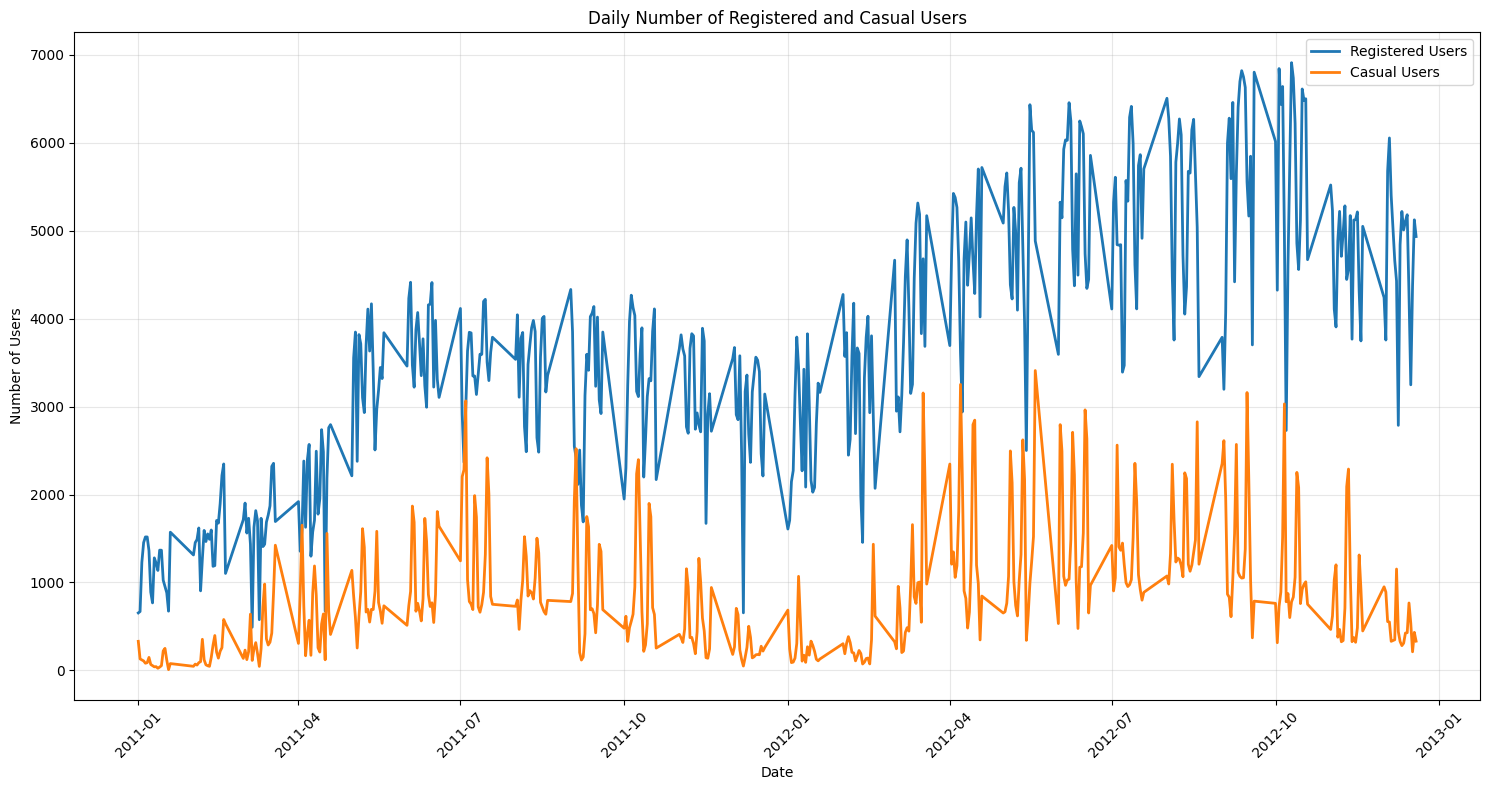

In [20]:
# Step 1. Create df_viz with grouped data
df_viz = df.groupby('date')[['registered', 'casual']].sum()

# Step 2. Create line plot
df_viz.plot(figsize=(15, 8),
           linewidth=2)

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Number of Users')
plt.title('Daily Number of Registered and Casual Users')

# Add grid for better readability
plt.grid(True, alpha=0.3)

# Rotate x-axis labels
plt.xticks(rotation=45)

plt.legend(['Registered Users', 'Casual Users'])

plt.tight_layout();

### **This visualization shows:**

***Two lines:***

* Blue line for registered users
* Orange line for casual users

***Patterns:***

* Registered users generally higher than casual
* Seasonal patterns visible
* Different patterns between user types
* Weekend/holiday effects

***Trends:***

1. Overall increase over time
2. Seasonal peaks and valleys
3. Different scales between user types

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1XGBqmFLXiI_v-MBEOiCQNyW6sUpvII1n)
